0.0. IMPORTS

In [83]:
import pandas as pd
import inflection
import numpy as np
import math
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import HTML


0.1. Helper Functions

In [84]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [85]:
jupyter_settings()

0.2 Loading Data

In [44]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)
# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store' )

1.0 DATA DESCRIPTION.

In [45]:
df1 = df_raw.copy()

1.1 Rename columns.


In [46]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales','Customers','Open', 'Promo','StateHoliday','SchoolHoliday',
               'StoreType', 'Assortment','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 
               'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']
snackecase = lambda x: inflection.underscore(x)
cols_new =list(map(snackecase, cols_old))
df1.columns = cols_new

1.2 Data Dimensions

In [47]:
print(f'number of Rows: {df1.shape[0]}')
print(f'Number of cols: {df1.shape[1]}')

number of Rows: 1017209
Number of cols: 18


1.3 variable date conversion

In [48]:
df1['date'] = pd.to_datetime(df1['date'] )

1.4 Sum of NA

In [41]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month         0
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
month_map                            0
dtype: int64

1.5 Fillout NA

In [42]:
# Code better than under! 
# date_open = df1.date
# df1.competition_open_since_month.fillna(df1.date, inplace=True)
# df1.competition_open_since_year.fillna(df1.date.dt.year, inplace=True)
# df1['is_promo'] = datedf1.date.dt.strftime("%b")
# print(df1.competition_open_since_month)

In [49]:
# competition_distance    
df1.competition_distance.fillna(10000., inplace=True)
#competition_open_since_month
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1 )

#competition_open_since_year 
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1 )

#promo2_since_week           
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )

#promo2_since_year           
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 )

#promo_interval              
month_map = {1: 'Jan',  2: 'Fev',  3: 'Mar',  4: 'Apr',  5: 'May',  6: 'Jun',  7: 'Jul',  8: 'Aug',  9: 'Sep',  10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True )

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 )


In [50]:
df1.sample(1).T

,91791
store,362
day_of_week,7
date,2015-05-10 00:00:00
sales,0
customers,0
open,0
promo,0
state_holiday,0
school_holiday,0
store_type,c


1.6. Change Types:

In [54]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [53]:
df1.competition_open_since_month = df1.competition_open_since_month.astype(int)
df1.competition_open_since_year = df1.competition_open_since_year.astype(int)
df1.promo2_since_week = df1.promo2_since_week.astype(int)
df1.promo2_since_year = df1.promo2_since_year.astype(int)

1.7 Descriptive Statiscal

In [55]:
# num_attributes select just numbers
# cat_attributes select just categories
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude =['int64', 'float64', 'datetime64[ns]'])


1.7.1 Numerical Attributes

In [63]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
# Dispersion- std, min, max, range, skew, kurtosis 
d1= pd.DataFrame(num_attributes.apply(np.std)).T
d2= pd.DataFrame(num_attributes.apply(min)).T
d3= pd.DataFrame(num_attributes.apply(max)).T
d4= pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5= pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6= pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
# concatenate
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()

In [65]:
m.columns=['attributes','min','max','range','averange','median','std','skew','kurtosis']

In [66]:
m

,attributes,min,max,range,averange,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,75860.0,75840.0,5441.955105,2330.0,7708.803743,2.924263,12.994788
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


1.7.2 Categorical Attributes

/home/duka/.pyenv/versions/3.8.0/envs/DataScienceProduction/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competition_distance'>

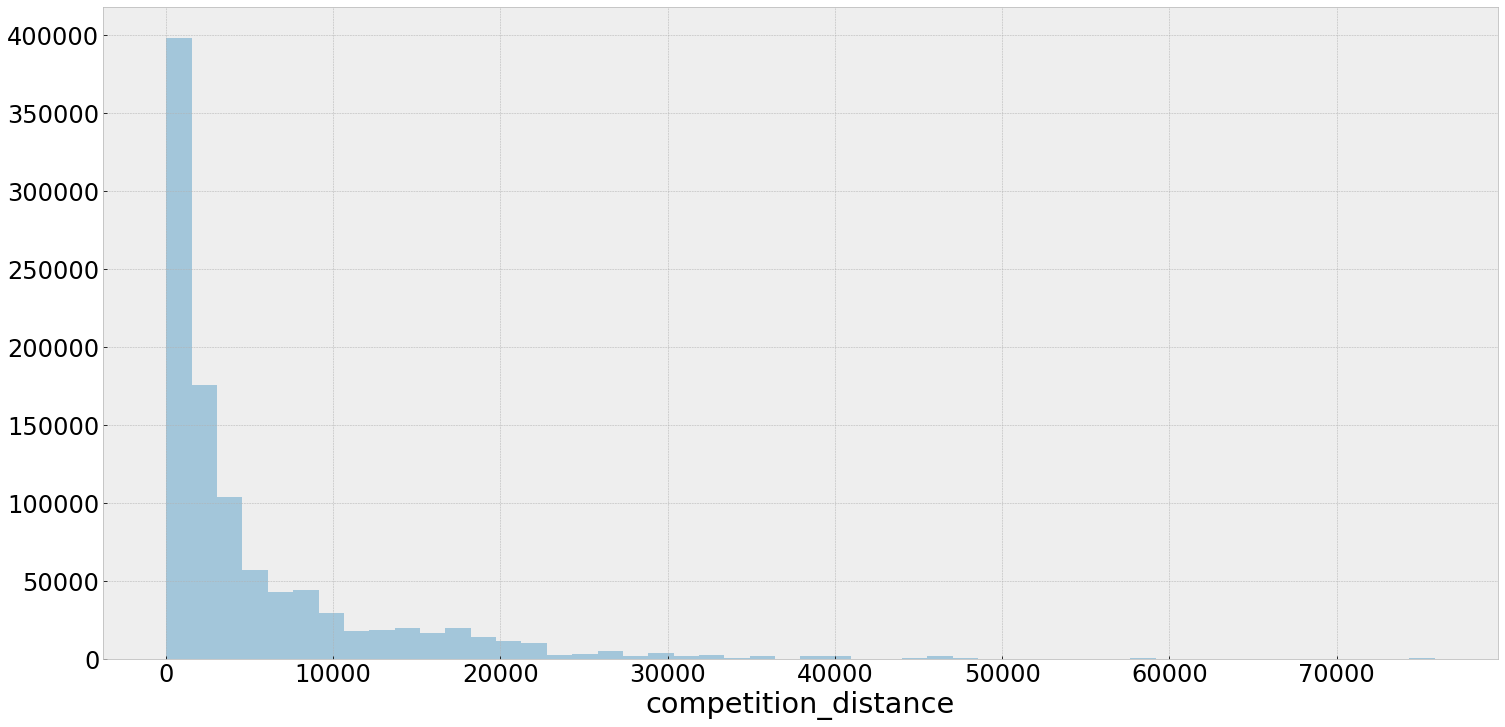

In [86]:
sns.distplot( df1['competition_distance'], kde=False )

In [ ]:
cat_attributes.apply(lambda x:x.unique().shape[0])

<AxesSubplot:xlabel='assortment', ylabel='sales'>

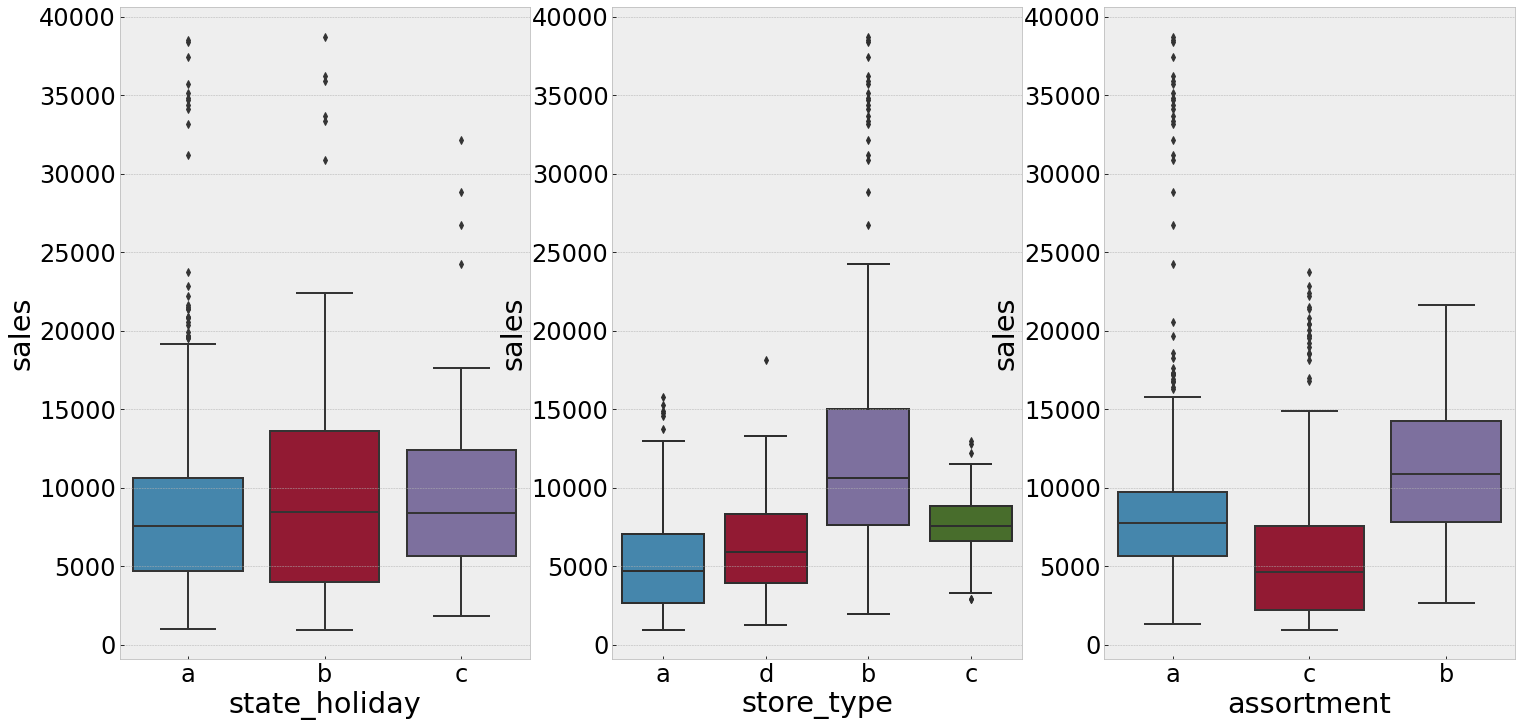

In [82]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]
plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data = aux1)
plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data = aux1)
plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data = aux1)